### Importing Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Loading data

In [6]:
df=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\innomatics_tasks\\task4\\data.xlsx - Sheet1.csv").copy()
df=df.iloc[:,1:]
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [8]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


### Data Cleaning

In [9]:
#removing duplicates
df.duplicated().sum()

0

In [10]:
#missing values
df.isna().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [17]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,0.350000,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,40.000000,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


#### Salary

In [18]:
#convert salary in lakhs
df['Salary']=df['Salary'].apply(lambda x:x/100000)
df['Salary']

0       0.000042
1       0.000050
2       0.000032
3       0.000110
4       0.000020
          ...   
3993    0.000028
3994    0.000010
3995    0.000032
3996    0.000020
3997    0.000040
Name: Salary, Length: 3998, dtype: float64

In [19]:
clean_df=pd.DataFrame(df['Salary'][df['Salary']<6])

In [21]:
num_salary_1To4=(clean_df['Salary'][(clean_df['Salary']>1)&(clean_df['Salary']<4)]).count()
(num_salary_1To4/len(df))*100

0.0

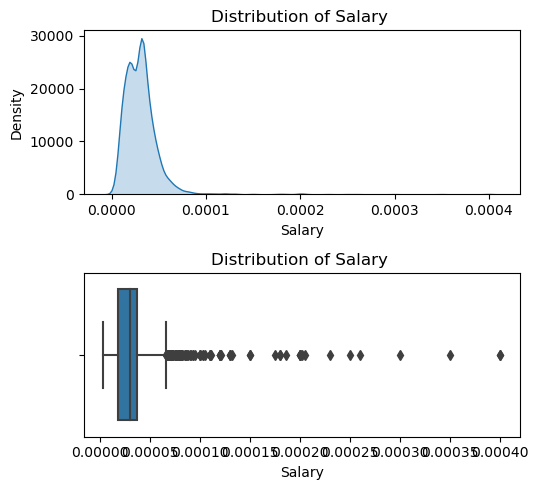

In [28]:
plt.figure(figsize=(10, 5))

plt.subplot(222)
sns.kdeplot(clean_df['Salary'], shade=True)
plt.title('Distribution of Salary ')

plt.subplot(224)
sns.boxplot(data=clean_df, x='Salary')
plt.title('Distribution of Salary ')

plt.tight_layout()
plt.show()


The salary range spans from 0.35 lakh to 40 lakhs, with the majority of candidates (72%) earning between 1 and 4 lakhs, and 99% earning less than 9.3 lakhs. Initially skewed to the right due to outliers, the distribution becomes more normal after their removal. Surprisingly, the distribution without outliers reveals a bimodal pattern, hinting at two distinct salary groups within the dataset..


### DOJ

In [33]:
df['DOJ'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3998 entries, 0 to 3997
Series name: DOJ
Non-Null Count  Dtype 
--------------  ----- 
3998 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


In [34]:
df['DOJ'] = pd.to_datetime(df['DOJ'])

In [35]:
years=df['DOJ'].apply(lambda x: x.year).value_counts()
clean_df['DOJ']=df['DOJ']
years

DOJ
2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2008       1
2006       1
1991       1
Name: count, dtype: int64

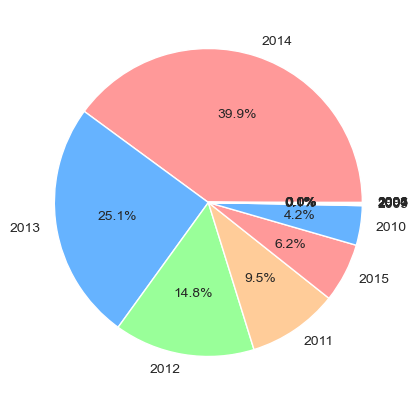

In [39]:
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(5, 5))
plt.pie(years.to_list(), labels=years.index, autopct='%1.1f%%', colors=custom_colors)

sns.set_style("whitegrid")



- 39.9% of students joined were born in 2014


### DOL

In [40]:
df['DOL'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3998 entries, 0 to 3997
Series name: DOL
Non-Null Count  Dtype 
--------------  ----- 
3998 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


In [41]:
df['DOL'].unique()

array(['present', '3/1/15 0:00', '5/1/15 0:00', '7/1/15 0:00',
       '4/1/15 0:00', '10/1/14 0:00', '9/1/14 0:00', '6/1/14 0:00',
       '9/1/12 0:00', '12/1/13 0:00', '6/1/15 0:00', '10/1/13 0:00',
       '1/1/15 0:00', '4/1/14 0:00', '6/1/13 0:00', '3/1/12 0:00',
       '7/1/14 0:00', '2/1/13 0:00', '1/1/14 0:00', '4/1/13 0:00',
       '7/1/12 0:00', '5/1/14 0:00', '9/1/13 0:00', '2/1/15 0:00',
       '1/1/12 0:00', '8/1/15 0:00', '8/1/14 0:00', '12/1/15 0:00',
       '12/1/14 0:00', '5/1/12 0:00', '3/1/11 0:00', '7/1/11 0:00',
       '2/1/14 0:00', '12/1/11 0:00', '10/1/15 0:00', '11/1/14 0:00',
       '3/1/14 0:00', '11/1/11 0:00', '5/1/13 0:00', '7/1/13 0:00',
       '11/1/13 0:00', '1/1/11 0:00', '5/1/11 0:00', '2/1/12 0:00',
       '11/1/12 0:00', '6/1/12 0:00', '8/1/13 0:00', '3/1/05 0:00',
       '3/1/13 0:00', '10/1/12 0:00', '2/1/11 0:00', '2/1/10 0:00',
       '1/1/13 0:00', '6/1/11 0:00', '9/1/15 0:00', '4/1/12 0:00',
       '8/1/12 0:00', '4/1/11 0:00', '10/1/11 0:00', '

In [42]:
(df['DOL']=='present').sum()

1875

In [43]:
def replacePresent(x):
    if x=='present':
        return pd.to_datetime('2050-12-31',format='%Y-%m-%d')
    return x

df['DOL']=df['DOL'].apply(replacePresent)
df['DOL'].value_counts()

DOL
2050-12-31 00:00:00    1875
4/1/15 0:00             573
3/1/15 0:00             124
5/1/15 0:00             112
1/1/15 0:00              99
                       ... 
3/1/05 0:00               1
10/1/15 0:00              1
2/1/10 0:00               1
2/1/11 0:00               1
10/1/10 0:00              1
Name: count, Length: 67, dtype: int64

In [44]:
clean_df['DOL']=df['DOL']
df['DOL'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3998 entries, 0 to 3997
Series name: DOL
Non-Null Count  Dtype 
--------------  ----- 
3998 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


#### Observation
- 46.9% of candidates assumed to be still working in their companies
- 26.5% candidates left company in 2015

### Designation

In [26]:
df['Designation'].value_counts()

Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419, dtype: int64

In [27]:
df['Designation'].value_counts()

Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419, dtype: int64

In [28]:
clean_df['Designation']=df['Designation']
df['Designation'].value_counts()[:15]

Designation
software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
java developer                 67
test engineer                  57
web developer                  54
application developer          52
assistant manager              52
Name: count, dtype: int64

In [29]:
# Percentage of candidates who are working in these top 15 job roles
(df['Designation'].value_counts()[:15].sum()/len(df))*100

49.6248124062031

<Axes: title={'center': 'Candidate Count for top 15 Designations'}, ylabel='Designation'>

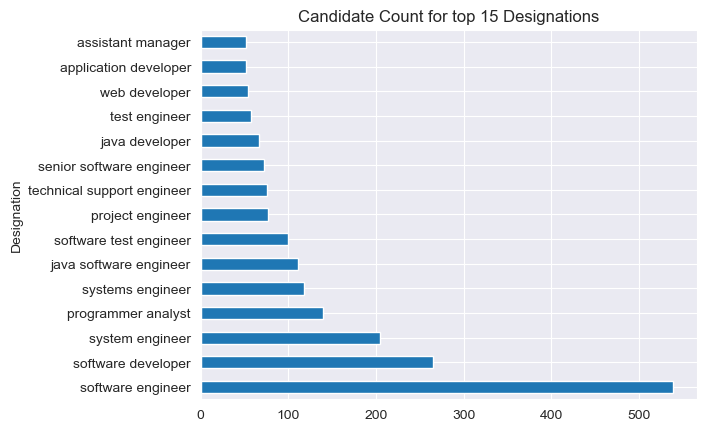

In [30]:
sns.set_style('darkgrid')
plt.title('Candidate Count for top 15 Designations')
df['Designation'].value_counts()[:15].plot(kind='barh')

#### Observation
- There are 390+ unique job roles
- 49.62 % of candidates are working in these 15 designations most notably as software engineer.

### Job City

In [31]:
df['JobCity']

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

In [32]:
df['JobCity'].value_counts()

JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: count, Length: 339, dtype: int64

In [33]:
df['JobCity']=df['JobCity'].str.lower().str.strip()
clean_df['JobCity']=df['JobCity']
df['JobCity'].unique()

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'banglore', 'noida', 'kolkata', 'pune', nan, 'mohali',
       'jhansi', 'delhi', 'bhubaneswar', 'navi mumbai', 'mumbai',
       'new delhi', 'mangalore', 'rewari', 'gaziabaad', 'bhiwadi',
       'mysore', 'rajkot', 'greater noida', 'jaipur', 'thane',
       'maharajganj', 'thiruvananthapuram', 'punchkula', 'bhubaneshwar',
       'coimbatore', 'dhanbad', 'lucknow', 'trivandrum', 'gandhi nagar',
       'una', 'daman and diu', 'gurgoan', 'vsakhapttnam', 'nagpur',
       'bhagalpur', 'new delhi - jaisalmer', 'ahmedabad', 'kochi/cochin',
       'bankura', 'bengaluru', 'kanpur', 'vijayawada', 'kochi', 'beawar',
       'alwar', 'siliguri', 'raipur', 'bhopal', 'faridabad', 'jodhpur',
       'udaipur', 'muzaffarpur', 'kolkata`', 'bulandshahar', 'haridwar',
       'raigarh', 'visakhapatnam', 'jabalpur', 'unnao', 'aurangabad',
       'belgaum', 'dehradun', 'rudrapur', 'jamshedpur', 'vizag', 'nouda',
       'dharams

In [34]:
df['JobCity'].isna().sum()      

461

In [35]:
df['JobCity'].value_counts()[:10]

JobCity
bangalore    665
noida        389
hyderabad    368
pune         327
chennai      313
gurgaon      217
new delhi    204
kolkata      119
mumbai       119
jaipur        53
Name: count, dtype: int64

In [36]:
(df['JobCity'].value_counts()[:10].sum()/len(df))*100

69.38469234617308

<Axes: title={'center': 'Top 10 Job Cities'}, ylabel='JobCity'>

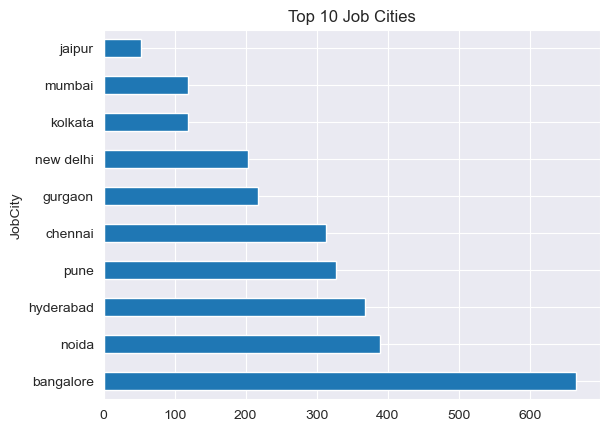

In [37]:
sns.set_style('darkgrid')
plt.title('Top 10 Job Cities')
df['JobCity'].value_counts()[:10].plot(kind='barh')

#### Observations
- 69.4% of candidates work in top 10 cities
- Banglore is the most popular career destination for candidates

#### 

### Gender

In [38]:
clean_df['Gender']=df['Gender']
df['Gender'].value_counts()

Gender
m    3041
f     957
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2138c5a50a0>,
 [Text(-0.803354993182058, 0.7514125065032227, 'm'),
  Text(0.803354993182058, -0.7514125065032227, 'f')],
 [Text(-0.4381936326447589, 0.40986136718357596, '76.1%'),
  Text(0.4381936326447589, -0.40986136718357596, '23.9%')])

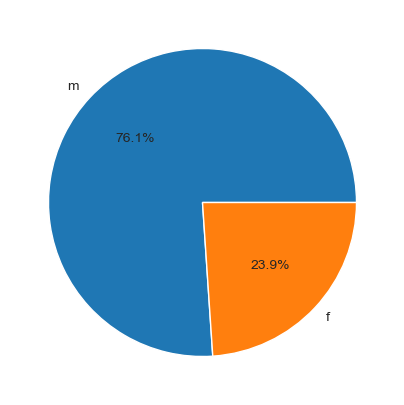

In [39]:
plt.figure(figsize=(5,5))
plt.pie(df['Gender'].value_counts().to_list(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%',)

#### Observation
- 76.1% of candidates are male
- 23.9% candidates are female

### DOB

In [40]:
clean_df['DOB']=df['DOB']
df['DOB']

0      1990-02-19
1      1989-10-04
2      1992-08-03
3      1989-12-05
4      1991-02-27
          ...    
3993   1987-04-15
3994   1992-08-27
3995   1991-07-03
3996   1992-03-20
3997   1991-02-26
Name: DOB, Length: 3998, dtype: datetime64[ns]

([<matplotlib.patches.Wedge at 0x2138c6081c0>,
 [Text(0.7902456431886813, 0.765187443324384, '1991'),
  Text(-0.65659196678506, 0.8825457433772637, '1992'),
  Text(-1.0337275509450496, -0.3760416870735877, '1990'),
  Text(-0.2223295609579297, -1.0772973435056148, '1989'),
  Text(0.47716089756887287, -0.9911193055486649, '1988'),
  Text(0.8789208408970779, -0.6614364334059424, '1993'),
  Text(1.0444937204113747, -0.34501140274084485, '1987'),
  Text(1.082393040122605, -0.19602374012895737, '1986'),
  Text(1.093816465754284, -0.11647119491448411, '1994'),
  Text(1.0980390143502332, -0.06565304992739192, '1985'),
  Text(1.099584008556975, -0.030249101239122327, '1984'),
  Text(1.0998899696944653, -0.015558102889122453, '1983'),
  Text(1.0999510973205553, -0.010372246781978293, '1995'),
  Text(1.099978265474005, -0.00691487417091984, '1982'),
  Text(1.0999915099953896, -0.004321798012706778, '1977'),
  Text(1.0999969436352761, -0.0025930663415245046, '1997'),
  Text(1.0999996604256972, -0.

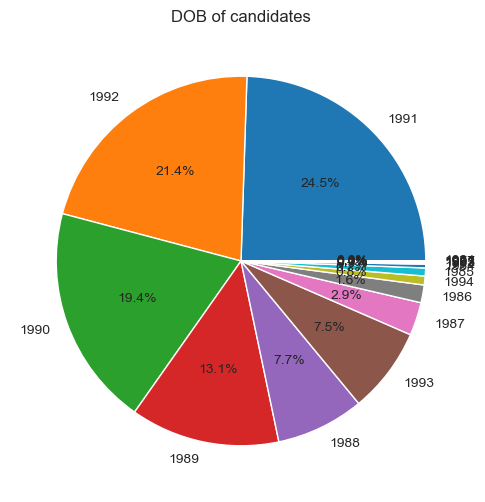

In [41]:
years=df['DOB'].apply(lambda x:x.year)
plt.figure(figsize=(6,6))
plt.title('DOB of candidates')
plt.pie(x=years.value_counts().to_list(),labels=years.value_counts().index,autopct='%1.1f%%')

#### Observation
- 65.3 % of candidates were born between 1990 and 1991

### 10Percentage

In [42]:
df['10percentage']

0       84.30
1       85.40
2       85.00
3       85.60
4       78.00
        ...  
3993    52.09
3994    90.00
3995    81.86
3996    78.72
3997    70.60
Name: 10percentage, Length: 3998, dtype: float64

In [43]:
df['10percentage'].describe()

count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: 10percentage, dtype: float64

<Axes: >

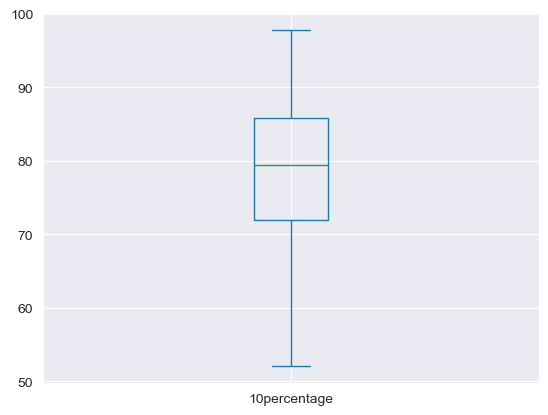

In [44]:
clean_df['10percentage']=df['10percentage'][df['10percentage']>52]
df['10percentage'][df['10percentage']>52].plot(kind='box')

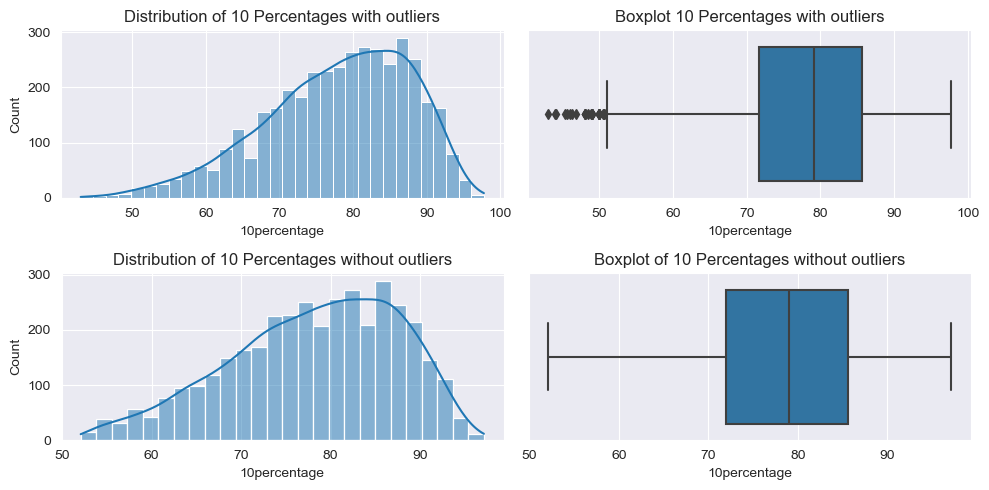

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.title('Distribution of 10 Percentages with outliers')
sns.histplot(x=df['10percentage'],kde=True)
plt.subplot(222)
plt.title('Boxplot 10 Percentages with outliers')
sns.boxplot(x=df['10percentage'])
plt.subplot(223)
plt.title('Distribution of 10 Percentages without outliers')
sns.histplot(x=clean_df['10percentage'],kde=True)
plt.subplot(224)
plt.title('Boxplot of 10 Percentages without outliers')
sns.boxplot(x=clean_df['10percentage'])
plt.tight_layout()


#### Observations
- Minimum percentage is 43% and max is 97.7%
- % are left skewed, means most candidates scored more than 60

### 10board

In [46]:
df['10board'].unique()[:10]

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education'], dtype=object)

In [47]:
def filterBoards(x):
    try:
        if x==0:
            return 'Not Specified'
        x=x.lower().strip()
        if 'cbse' in x or 'central' in x:
            return 'CBSE'
        return 'State Board'
    except Exception as e:
        print(x)
    

In [48]:
df['10board']=df['10board'].apply(filterBoards)
clean_df['10board']=df['10board']
df['10board'].value_counts()

10board
State Board      2235
CBSE             1413
Not Specified     350
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2138ba71880>,
 [Text(-0.20282415745552423, 1.0811393810015695, 'State Board'),
  Text(-0.09840639124763757, -1.0955894222570868, 'CBSE'),
  Text(1.0586597198189724, -0.29872997444651417, 'Not Specified')],
 [Text(-0.11063135861210412, 0.5897123896372197, '55.9%'),
  Text(-0.05367621340780231, -0.5975942303220473, '35.3%'),
  Text(0.577450756264894, -0.16294362242537133, '8.8%')])

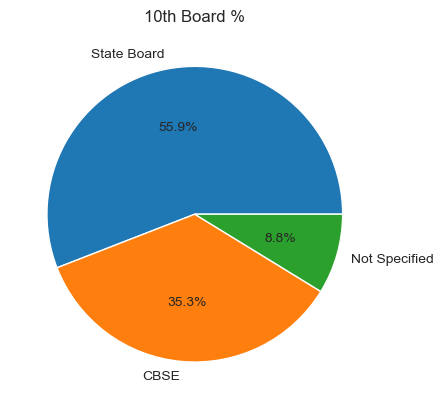

In [49]:
plt.title('10th Board %')
plt.pie(x=df['10board'].value_counts().to_list(),labels=df['10board'].value_counts().index,autopct='%1.1f%%')

#### Observations
- 35.3% of candidates belong to CBSE and 55.9% belong to State Board
- 8.8% candidates have not shared their 10th board

### 12board

In [53]:
df['12board'].unique()[:10]

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education'],
      dtype=object)

In [54]:
def filterBoards(x):
    try:
        if x==0:
            return 'Not Specified'
        x=x.lower().strip()
        if 'cbse' in x or 'central' in x:
            return 'CBSE'
        return 'State Board'
    except Exception as e:
        print(x)
    

In [55]:
df['12board']=df['12board'].apply(filterBoards)
clean_df['12board']=df['12board']
df['12board'].value_counts()

12board
State Board      2224
CBSE             1415
Not Specified     359
Name: count, dtype: int64

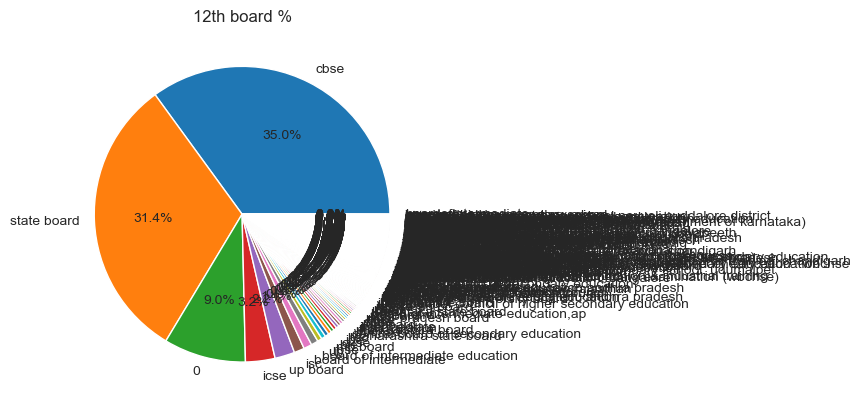

In [54]:
plt.title('12th board %')
plt.pie(x=df['12board'].value_counts().to_list(),labels=df['12board'].value_counts().index,autopct='%1.1f%%')
plt.show()

### CollegeID

In [57]:
df['CollegeID']
# No need

0        1141
1        5807
2          64
3        6920
4       11368
        ...  
3993     6268
3994     4883
3995     9786
3996      979
3997     6609
Name: CollegeID, Length: 3998, dtype: int64

### College Tier

In [58]:
df['CollegeTier'].unique()

array([2, 1], dtype=int64)

In [59]:
df['CollegeTier']=df['CollegeTier'].map({1:'Tier 1',2:'Tier 2'})
clean_df['CollegeTier']=df['CollegeTier']
clean_df['CollegeTier'].value_counts()

CollegeTier
Tier 2    3561
Tier 1     246
Name: count, dtype: int64

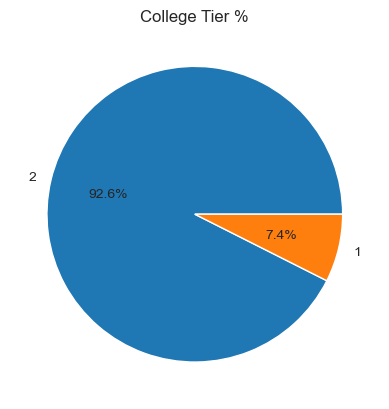

In [53]:
plt.title('College Tier %')
plt.pie(x=df['CollegeTier'].value_counts().to_list(),labels=df['CollegeTier'].value_counts().index,autopct='%1.1f%%')
plt.show()

### Degree

In [61]:
clean_df['Degree']=df['Degree']
df['Degree'].value_counts()

Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64

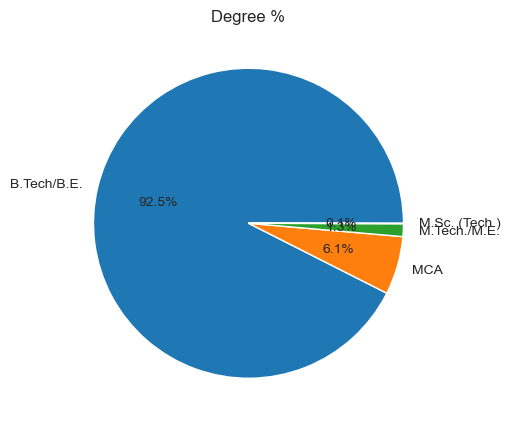

In [52]:
plt.figure(figsize=(5,15))
plt.title('Degree %')
plt.pie(x=df['Degree'].value_counts().to_list(),labels=df['Degree'].value_counts().index,autopct='%1.1f%%')
plt.show()

### Specialization

In [63]:
clean_df['Specialization']=df['Specialization']
df['Specialization'].value_counts()

Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical enginee

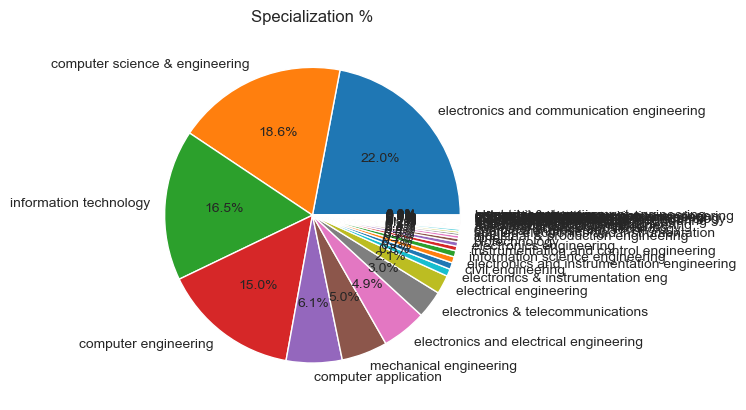

In [51]:
plt.title('Specialization %')
plt.pie(x=df['Specialization'].value_counts().to_list(),labels=df['Specialization'].value_counts().index,autopct='%1.1f%%')
plt.show()

### CollegeGPA

In [65]:
df.rename(columns={'collegeGPA':'CollegeGPA'},inplace=True)
df['CollegeGPA']

0       78.00
1       70.06
2       70.00
3       74.64
4       73.90
        ...  
3993    61.50
3994    77.30
3995    70.00
3996    70.42
3997    68.00
Name: CollegeGPA, Length: 3998, dtype: float64

<Axes: ylabel='Frequency'>

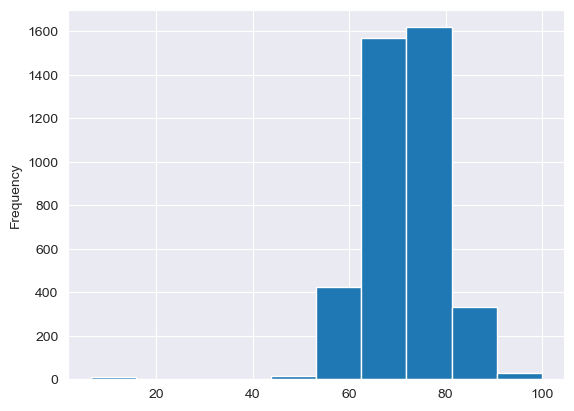

In [66]:
df['CollegeGPA'].plot(kind='hist')
# Need to convert entries in 100 point scale to 10 point scale

In [67]:
def toGPA(x):
    if x>11:
        return x/10
    return x

<Axes: ylabel='Frequency'>

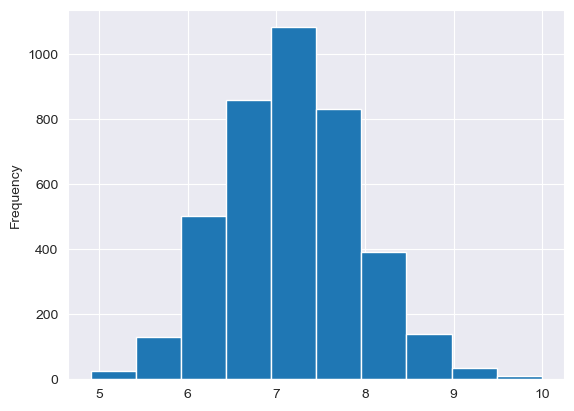

In [68]:
df['CollegeGPA'].apply(toGPA).plot(kind='hist')

In [69]:

df['CollegeGPA'].apply(toGPA).describe()

count    3998.000000
mean        7.169573
std         0.740663
min         4.907000
25%         6.650500
50%         7.180000
75%         7.640000
max         9.993000
Name: CollegeGPA, dtype: float64

<Axes: >

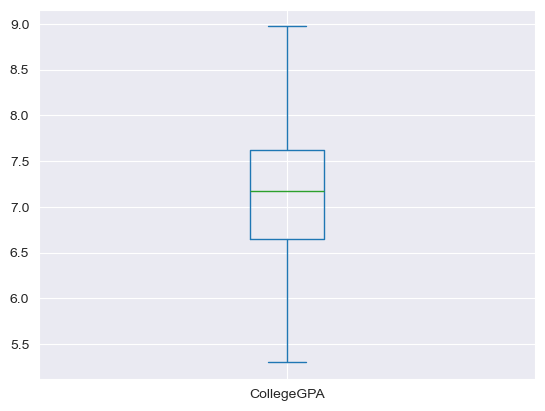

In [70]:
df['CollegeGPA']=df['CollegeGPA'].apply(toGPA)
clean_df['CollegeGPA']=df['CollegeGPA'][(df['CollegeGPA']<9)&(df['CollegeGPA']>5.2)]
df['CollegeGPA'][(df['CollegeGPA']<9)&(df['CollegeGPA']>5.2)].plot(kind='box')

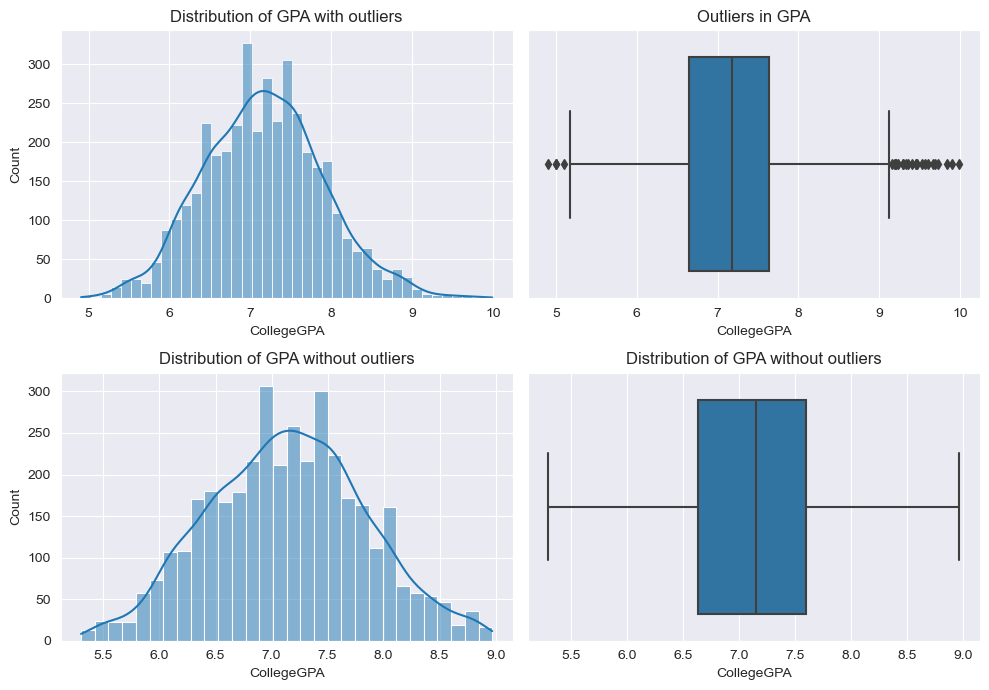

In [71]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.title('Distribution of GPA with outliers')
sns.histplot(x=df['CollegeGPA'],kde=True)
plt.subplot(222)
plt.title('Outliers in GPA')
sns.boxplot(x=df['CollegeGPA'])
plt.subplot(223)
plt.title('Distribution of GPA without outliers')
sns.histplot(x=clean_df['CollegeGPA'],kde=True)
plt.subplot(224)
plt.title('Distribution of GPA without outliers')
sns.boxplot(x=clean_df['CollegeGPA'])
plt.tight_layout()


#### Observation 
- Median GPA is 7.16 and 75% candidates have less than 7.62 GPA
- minimum GPA is 4.9 and max GPA is 9.99

In [72]:
df['CollegeGPA'].describe()

count    3998.000000
mean        7.169573
std         0.740663
min         4.907000
25%         6.650500
50%         7.180000
75%         7.640000
max         9.993000
Name: CollegeGPA, dtype: float64

### CollegeCityTier

In [73]:
df['CollegeCityTier'].value_counts()

CollegeCityTier
0    2797
1    1201
Name: count, dtype: int64

In [74]:
df['CollegeCityTier']=df['CollegeCityTier'].map({0:'Tier 2',1:'Tier 1'})
clean_df['CollegeCityTier']=df['CollegeCityTier']
df['CollegeCityTier'].value_counts()

CollegeCityTier
Tier 2    2797
Tier 1    1201
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2138c8d6940>,
 [Text(-0.645444409814041, 0.8907308874400867, 'Tier 2'),
  Text(0.6454444098140409, -0.8907308874400868, 'Tier 1')],
 [Text(-0.3520605871712951, 0.4858532113309563, '70.0%'),
  Text(0.352060587171295, -0.4858532113309564, '30.0%')])

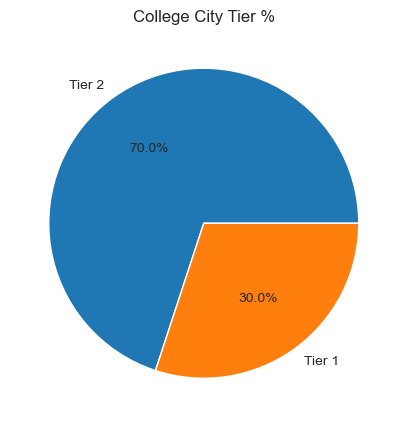

In [75]:
plt.figure(figsize=(5,15))
plt.title('College City Tier %')
plt.pie(x=df['CollegeCityTier'].value_counts().to_list(),labels=df['CollegeCityTier'].value_counts().index,autopct='%1.1f%%')


### CollegeState

In [76]:
df['CollegeState'].unique()

array(['Andhra Pradesh', 'Madhya Pradesh', 'Uttar Pradesh', 'Delhi',
       'Karnataka', 'Tamil Nadu', 'West Bengal', 'Maharashtra', 'Haryana',
       'Telangana', 'Orissa', 'Punjab', 'Kerala', 'Gujarat', 'Rajasthan',
       'Chhattisgarh', 'Uttarakhand', 'Jammu and Kashmir', 'Jharkhand',
       'Himachal Pradesh', 'Bihar', 'Assam', 'Goa', 'Sikkim',
       'Union Territory', 'Meghalaya'], dtype=object)

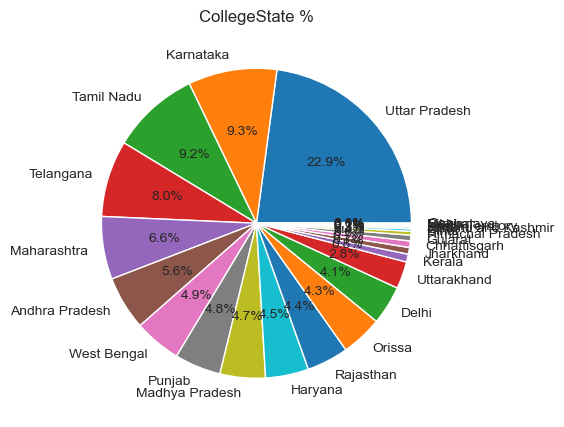

In [50]:
clean_df['CollegeState']=df[['CollegeState']]
plt.figure(figsize=(5,15))
plt.title('CollegeState %')
plt.pie(x=df['CollegeState'].value_counts().to_list(),labels=df['CollegeState'].value_counts().index,autopct='%1.1f%%')
plt.show()

### GraduationYear

In [78]:
df['GraduationYear'].value_counts()

GraduationYear
2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: count, dtype: int64

In [79]:
clean_df['GraduationYear']=(df['GraduationYear'][df['GraduationYear']!=0]).astype(int)
clean_df['GraduationYear'].value_counts()


GraduationYear
2013.0    1146
2014.0    1015
2012.0     819
2011.0     461
2010.0     242
2015.0      89
2009.0      18
2017.0       8
2016.0       7
2007.0       1
Name: count, dtype: int64

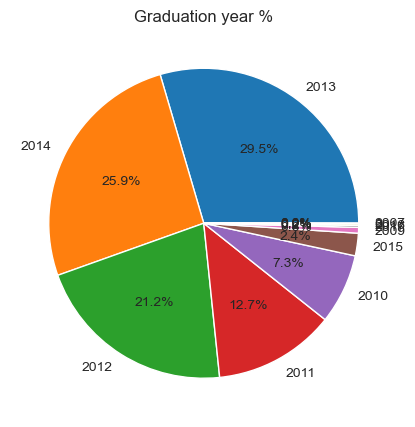

In [46]:
plt.figure(figsize=(5,15))
plt.title('Graduation year %')
plt.pie(x=df['GraduationYear'].value_counts().to_list(),labels=df['GraduationYear'].value_counts().index,autopct='%1.1f%%')
plt.show()

### English

In [81]:
df['English'].describe()

count    3998.000000
mean      501.649075
std       104.940021
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64

<Axes: >

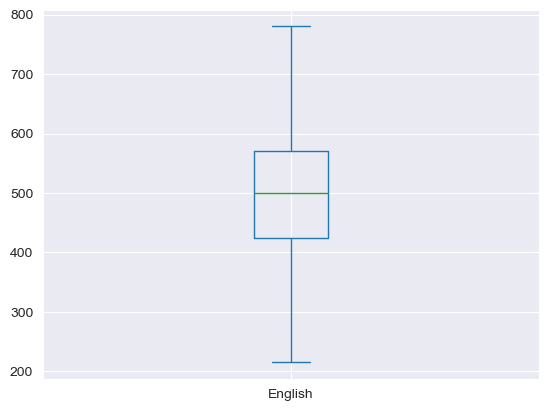

In [82]:
df['English'][(df['English']>210)&(df['English']<790)].plot(kind='box')

In [83]:
scaler = MinMaxScaler()
stand_marks = pd.DataFrame(index=df.index)  # Defining the index

# Standarize the 'English' column and assign it to 'stand_marks'
stand_marks['English'] = scaler.fit_transform(df[['English']])


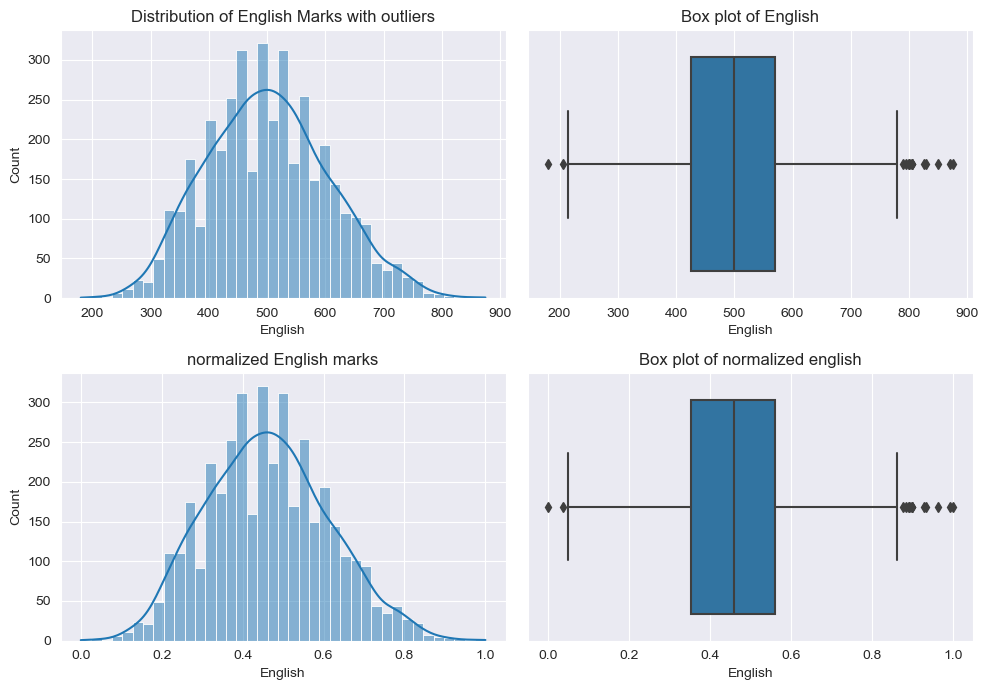

In [84]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.title('Distribution of English Marks with outliers')
sns.histplot(x=df['English'],kde=True)
plt.subplot(222)
plt.title('Box plot of English')
sns.boxplot(x=df['English'])
plt.subplot(223)
plt.title('normalized English marks')
sns.histplot(x=stand_marks['English'],kde=True)
plt.subplot(224)
plt.title('Box plot of normalized english')
sns.boxplot(x=stand_marks['English'])
plt.tight_layout()


#### Observation
- Distribution of English marks resemble normal distribution
- 75% of students scored less than 570 marks 
- max marks scored is 875 and minimum marks scored=180

### Logical

In [85]:
df['Logical'].describe()

count    3998.000000
mean      501.598799
std        86.783297
min       195.000000
25%       445.000000
50%       505.000000
75%       565.000000
max       795.000000
Name: Logical, dtype: float64

In [86]:
stand_marks['Logical']=scaler.fit_transform(df[['Logical']])

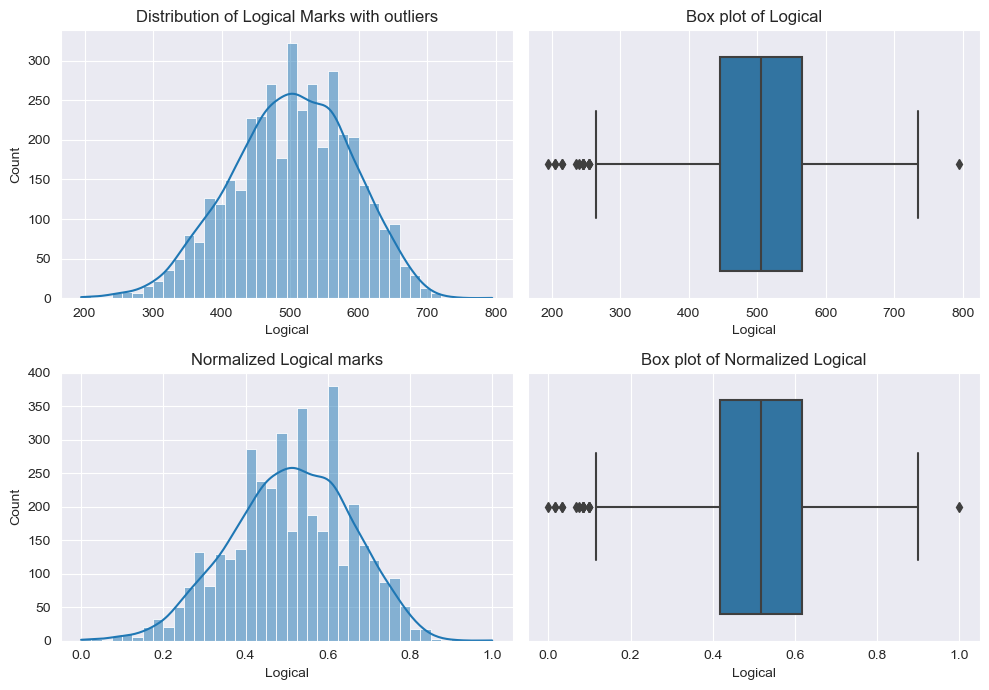

In [87]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.title('Distribution of Logical Marks with outliers')
sns.histplot(x=df['Logical'],kde=True)
plt.subplot(222)
plt.title('Box plot of Logical')
sns.boxplot(x=df['Logical'])
plt.subplot(223)
plt.title('Normalized Logical marks')
sns.histplot(x=stand_marks['Logical'],kde=True)
plt.subplot(224)
plt.title('Box plot of Normalized Logical')
sns.boxplot(x=stand_marks['Logical'])
plt.tight_layout()


#### Observation
- Logical Marks are left skwed and 75% candidates scored above 445

### Quant

In [88]:
df['Quant'].describe()

count    3998.000000
mean      513.378189
std       122.302332
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: Quant, dtype: float64

In [89]:
stand_marks['Quant']=scaler.fit_transform(df[['Quant']])

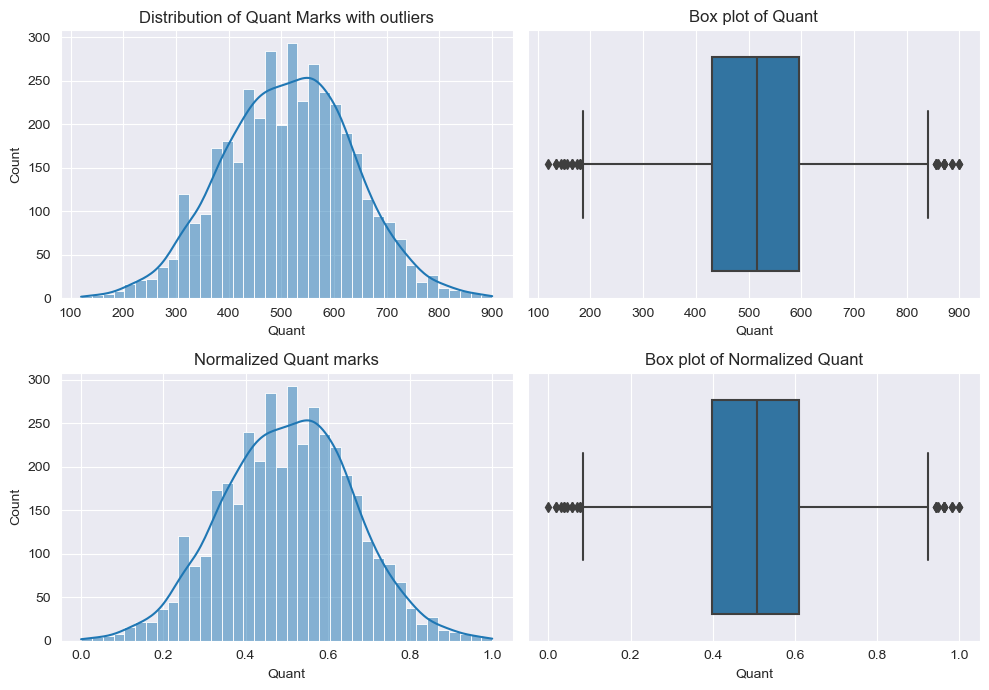

In [90]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.title('Distribution of Quant Marks with outliers')
sns.histplot(x=df['Quant'],kde=True)
plt.subplot(222)
plt.title('Box plot of Quant')
sns.boxplot(x=df['Quant'])
plt.subplot(223)
plt.title('Normalized Quant marks')
sns.histplot(x=stand_marks['Quant'],kde=True)
plt.subplot(224)
plt.title('Box plot of Normalized Quant')
sns.boxplot(x=stand_marks['Quant'])
plt.tight_layout()


#### Observation
- Quant marks are normally distributed
- 75% candidates scored less than 595 and max score is 900

In [91]:
df['Quant'].describe()

count    3998.000000
mean      513.378189
std       122.302332
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: Quant, dtype: float64

### Domain

In [92]:
df['Domain'].describe()

count    3998.000000
mean        0.510490
std         0.468671
min        -1.000000
25%         0.342315
50%         0.622643
75%         0.842248
max         0.999910
Name: Domain, dtype: float64

In [93]:
(df['Domain'][df['Domain']==-1].count()/len(df))*100

6.153076538269135

Text(0.5, 1.0, 'Normalized Domain Score Distribution')

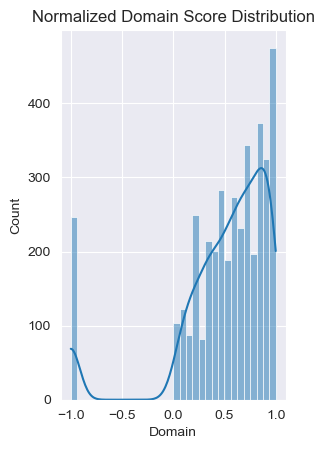

In [94]:
plt.subplot(121)
sns.histplot(x=df['Domain'],kde=True)
plt.title('Normalized Domain Score Distribution')

#### Observation
- Normalized Domain Score is left skewed. If we ignore -1.
- 6.15 % of candidates didn't filled their domain scores.

### Computer Programming

In [95]:
df['ComputerProgramming'].describe()

count    3998.000000
mean      353.102801
std       205.355519
min        -1.000000
25%       295.000000
50%       415.000000
75%       495.000000
max       840.000000
Name: ComputerProgramming, dtype: float64

In [96]:
(df['ComputerProgramming'][df['ComputerProgramming']!=-1].count()/len(df))*100

78.28914457228613

<Axes: xlabel='ComputerProgramming', ylabel='Count'>

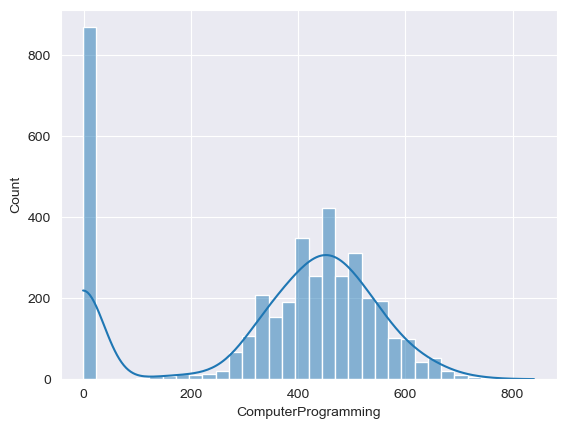

In [97]:
sns.histplot(x=df['ComputerProgramming'],kde=True)

#### Observation 
- 78.3 % of candidates attempted computer programming section
- Computer Programming scores are normally distributed

### Electronics and Semicon

In [98]:
df['ElectronicsAndSemicon'].describe()

count    3998.000000
mean       95.328414
std       158.241218
min        -1.000000
25%        -1.000000
50%        -1.000000
75%       233.000000
max       612.000000
Name: ElectronicsAndSemicon, dtype: float64

In [99]:
(df['ElectronicsAndSemicon'][df['ElectronicsAndSemicon']!=-1].count()/len(df))*100

28.61430715357679

<Axes: xlabel='ElectronicsAndSemicon', ylabel='Count'>

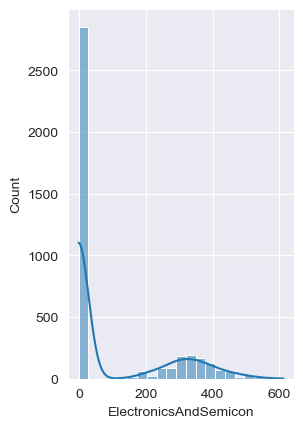

In [100]:
plt.subplot(121)
sns.histplot(x=df['ElectronicsAndSemicon'],kde=True)

#### Observation
- 28.6% of candidates gave ElectronicsAndSemicon exam

### Computer Science

In [101]:
df['ComputerScience'].describe()

count    3998.000000
mean       90.742371
std       175.273083
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       715.000000
Name: ComputerScience, dtype: float64

In [102]:
(df['ComputerScience'][df['ComputerScience']!=-1].count()/len(df))*100

22.56128064032016

<Axes: xlabel='ComputerScience', ylabel='Count'>

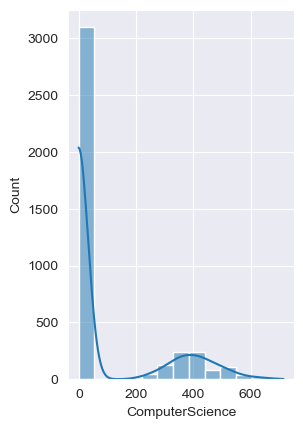

In [103]:
plt.subplot(121)
sns.histplot(x=df['ComputerScience'],kde=True)

#### Observations
- 22.561% of candidates have attempted the Computer Science exam

### Mechanical Engineering

In [104]:
df['MechanicalEngg'].describe()

count    3998.000000
mean       22.974737
std        98.123311
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       623.000000
Name: MechanicalEngg, dtype: float64

In [105]:
(df['MechanicalEngg'][df['MechanicalEngg']!=-1].count()/len(df))*100

5.877938969484743

<Axes: xlabel='MechanicalEngg', ylabel='Count'>

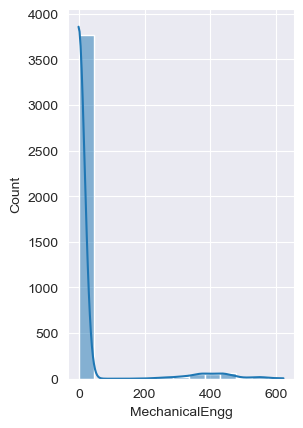

In [106]:
plt.subplot(121)
sns.histplot(x=df['MechanicalEngg'],kde=True)

#### Observations
- 5.9 % candidates have attempted Mechanical Enggineering section

### Electrical Engineering

In [107]:
df['ElectricalEngg'].describe()

count    3998.000000
mean       16.478739
std        87.585634
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       676.000000
Name: ElectricalEngg, dtype: float64

In [108]:
(df['ElectricalEngg'][df['ElectricalEngg']!=-1].count()/len(df))*100

4.027013506753377

<Axes: xlabel='ElectricalEngg', ylabel='Count'>

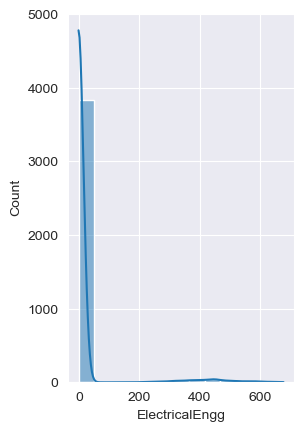

In [109]:
plt.subplot(121)
sns.histplot(x=df['ElectricalEngg'],kde=True)

#### Observation
- Only 4% of candidates attempted Elctrical Engineering

### Telecom Engg

In [110]:
df['TelecomEngg'].describe()

count    3998.000000
mean       31.851176
std       104.852845
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       548.000000
Name: TelecomEngg, dtype: float64

In [111]:
(df['TelecomEngg'][df['TelecomEngg']!=-1].count()/len(df))*100

9.354677338669335

<Axes: xlabel='TelecomEngg', ylabel='Count'>

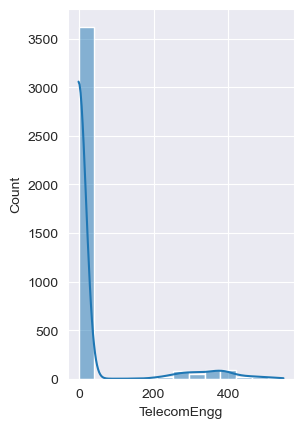

In [112]:
plt.subplot(121)
sns.histplot(x=df['TelecomEngg'],kde=True)

#### Observation 
- Only 9% candidates attempted telecom engg

### Civil Engg

In [113]:
df['CivilEngg'].describe()

count    3998.000000
mean        2.683842
std        36.658505
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       516.000000
Name: CivilEngg, dtype: float64

In [114]:
(df['CivilEngg'][df['CivilEngg']!=-1].count()/len(df))*100

1.0505252626313157

<Axes: xlabel='CivilEngg', ylabel='Count'>

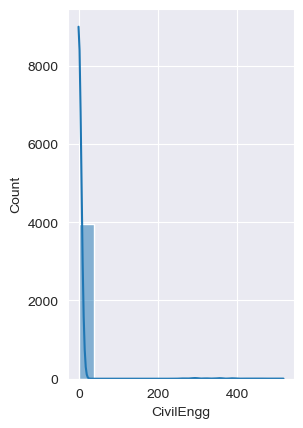

In [115]:
plt.subplot(121)
sns.histplot(x=df['CivilEngg'],kde=True)

#### Observation
- Only 1% of candidates attempted the CivilEngg 

### Personality Tests

In [116]:
df['conscientiousness'].describe()

count    3998.000000
mean       -0.037831
std         1.028666
min        -4.126700
25%        -0.713525
50%         0.046400
75%         0.702700
max         1.995300
Name: conscientiousness, dtype: float64

<Axes: xlabel='conscientiousness', ylabel='Count'>

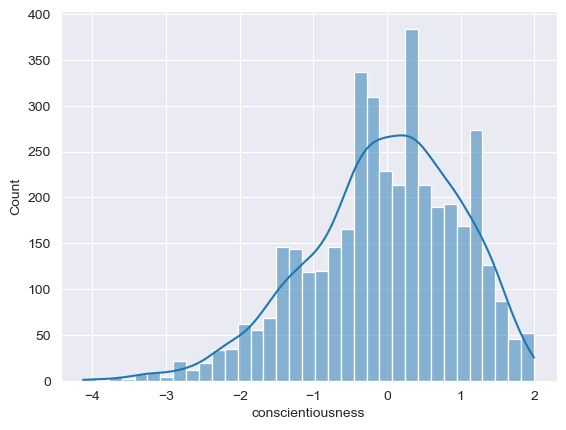

In [117]:
sns.histplot(x=df['conscientiousness'],kde=True)

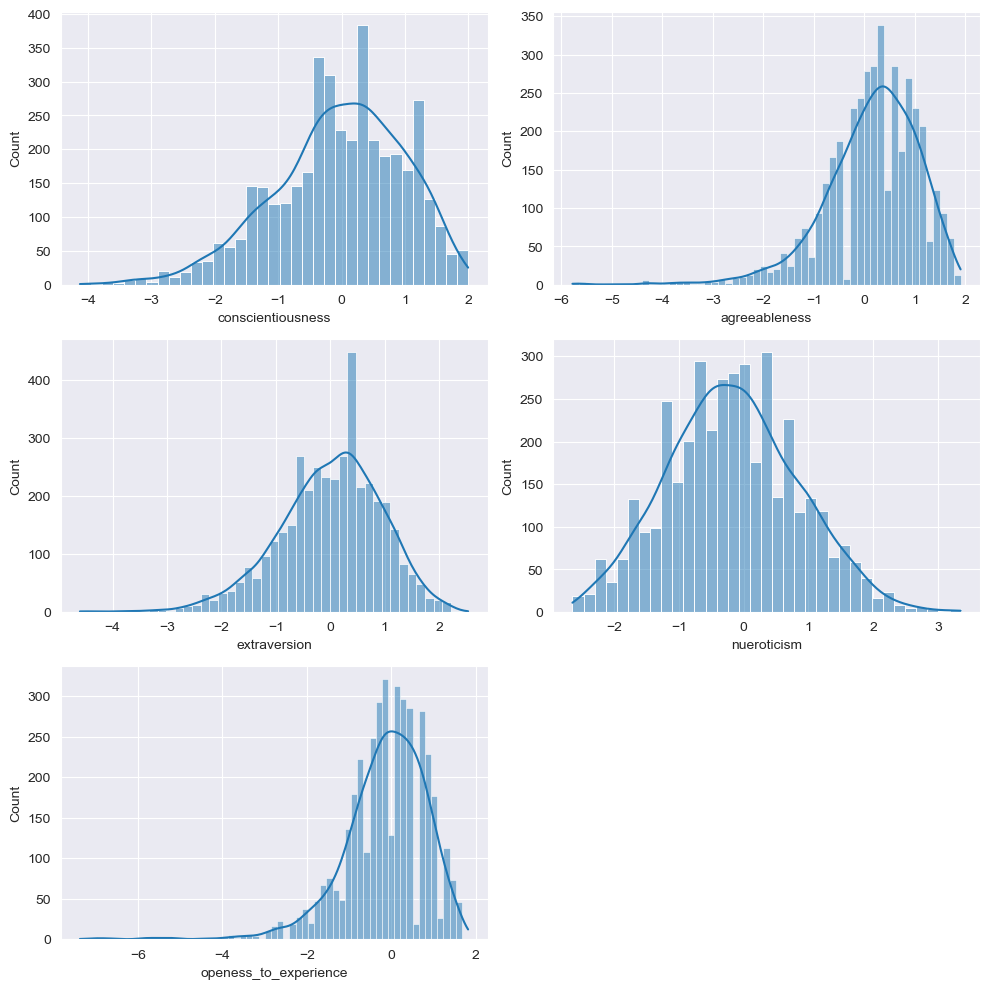

In [118]:
personality_test_scores=df.iloc[:,33:]
count=1
plt.figure(figsize=(10,10))
for col in (personality_test_scores.columns):

    plt.subplot(3,2,count)
    sns.histplot(x=df[col],kde=True)
    count+=1
plt.tight_layout()

#### Observation
- Except nueroticism, other personality traits are left skewed


# Handling outliers


In [119]:
def remove_outliers_iqr(df,column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 +1.5* IQR
    
    def checkoutlier(x):
        if x<lower_bound or x>upper_bound:
            return None
        return x
    # Replace outliers with None
    return df[column_name].apply(checkoutlier)

In [120]:
remove_outliers_iqr(df,'Salary')

0       4.20
1       5.00
2       3.25
3        NaN
4       2.00
        ... 
3993    2.80
3994    1.00
3995    3.20
3996    2.00
3997    4.00
Name: Salary, Length: 3998, dtype: float64

In [121]:
numerical_cols=[col for col in df.columns if df[col].dtype!='O'][1:]
categorical_cols=[col for col in df.columns if df[col].dtype=='O'][1:]
clean_df=df[numerical_cols]
clean_df

,Salary,DOJ,DOL,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeGPA,CollegeCityID,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,4.20,2012-06-01,2050-12-31,1990-02-19,84.30,2007,95.80,1141,7.800,1141,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,5.00,2013-09-01,2050-12-31,1989-10-04,85.40,2007,85.00,5807,7.006,5807,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,3.25,2014-06-01,2050-12-31,1992-08-03,85.00,2010,68.20,64,7.000,64,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,11.00,2011-07-01,2050-12-31,1989-12-05,85.60,2007,83.60,6920,7.464,6920,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,2.00,2014-03-01,2015-03-01,1991-02-27,78.00,2008,76.80,11368,7.390,11368,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,2.80,2011-10-01,2012-10-01,1987-04-15,52.09,2006,55.50,6268,6.150,6268,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,1.00,2013-07-01,2013-07-01,1992-08-27,90.00,2009,93.00,4883,7.730,4883,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,3.20,2013-07-01,2050-12-31,1991-07-03,81.86,2008,65.50,9786,7.000,9786,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,2.00,2014-07-01,2015-01-01,1992-03-20,78.72,2010,69.88,979,7.042,979,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [122]:
for col in numerical_cols:
    clean_df.loc[:,col]=remove_outliers_iqr(df,col)
clean_df

,Salary,DOJ,DOL,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeGPA,CollegeCityID,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,4.20,2012-06-01,2050-12-31,1990-02-19,84.30,2007.0,95.80,1141,7.800,1141,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,5.00,2013-09-01,2050-12-31,1989-10-04,85.40,2007.0,85.00,5807,7.006,5807,...,-1.0,-1.0,-1.0,-1.0,-1.0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,3.25,2014-06-01,2050-12-31,1992-08-03,85.00,2010.0,68.20,64,7.000,64,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,NaN,2011-07-01,2050-12-31,1989-12-05,85.60,2007.0,83.60,6920,7.464,6920,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,2.00,2014-03-01,2015-03-01,1991-02-27,78.00,2008.0,76.80,11368,7.390,11368,...,-1.0,-1.0,-1.0,-1.0,-1.0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,2.80,2011-10-01,2012-10-01,1987-04-15,52.09,2006.0,55.50,6268,6.150,6268,...,-1.0,-1.0,-1.0,-1.0,-1.0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,1.00,2013-07-01,2013-07-01,1992-08-27,90.00,2009.0,93.00,4883,7.730,4883,...,-1.0,-1.0,-1.0,-1.0,-1.0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,3.20,2013-07-01,2050-12-31,1991-07-03,81.86,2008.0,65.50,9786,7.000,9786,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,2.00,2014-07-01,2015-01-01,1992-03-20,78.72,2010.0,69.88,979,7.042,979,...,NaN,-1.0,-1.0,-1.0,-1.0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [123]:
clean_df=pd.concat([clean_df,df[categorical_cols]],axis=1)


In [124]:
clean_df.isnull().sum()

Salary                   109
DOJ                       19
DOL                        0
DOB                       68
10percentage              30
12graduation              45
12percentage               1
CollegeID                  0
CollegeGPA                27
CollegeCityID              0
GraduationYear             2
English                   15
Logical                   18
Quant                     25
Domain                   246
ComputerProgramming        2
ElectronicsAndSemicon      2
ComputerScience          902
MechanicalEngg           235
ElectricalEngg           161
TelecomEngg              374
CivilEngg                 42
conscientiousness         39
agreeableness            123
extraversion              40
nueroticism               15
openess_to_experience     95
JobCity                  461
Gender                     0
10board                    0
12board                    0
CollegeTier                0
Degree                     0
Specialization             0
CollegeCityTie

In [125]:
clean_df.dropna(axis=0,inplace=True)

In [126]:
clean_df.isna().sum()

Salary                   0
DOJ                      0
DOL                      0
DOB                      0
10percentage             0
12graduation             0
12percentage             0
CollegeID                0
CollegeGPA               0
CollegeCityID            0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
JobCity                  0
Gender                   0
10board                  0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
CollegeCityTier          0
CollegeState             0
dtype: int64

# Bivariate Analysis

### Degree and Specialization vs Salary

<Axes: title={'center': 'Salary without outliers vs Degree'}, xlabel='Degree', ylabel='Salary'>

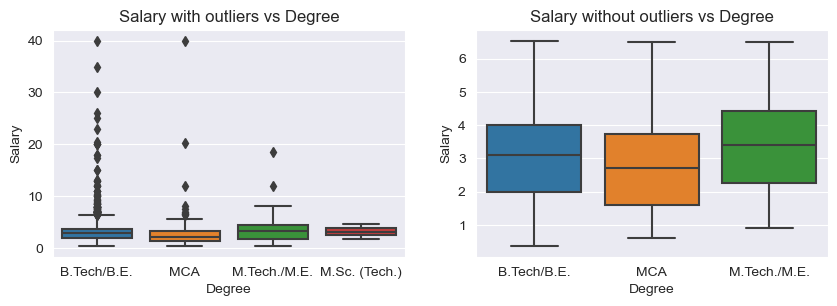

In [134]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.title('Salary with outliers vs Degree')
sns.boxplot(data=df[['Salary','Degree']],x='Degree',y='Salary')
plt.subplot(322)
plt.title('Salary without outliers vs Degree')
sns.boxplot(data=clean_df[['Salary','Degree']],x='Degree',y='Salary')


#### Observations
- The density of outliers is more in B.Tech/BE degree than M.Tech/ME. Hence, higher packages are more likely be secured by studying B.Tech. 
- But when outliers are removed, M.Tech offers better median package than even MCA.

In [135]:
salary_special=df[['Salary','Specialization']].groupby(by='Specialization')

Text(0.5, 1.0, 'Top 10 Specializations w.r.t min Salary ')

<Figure size 1000x1000 with 0 Axes>

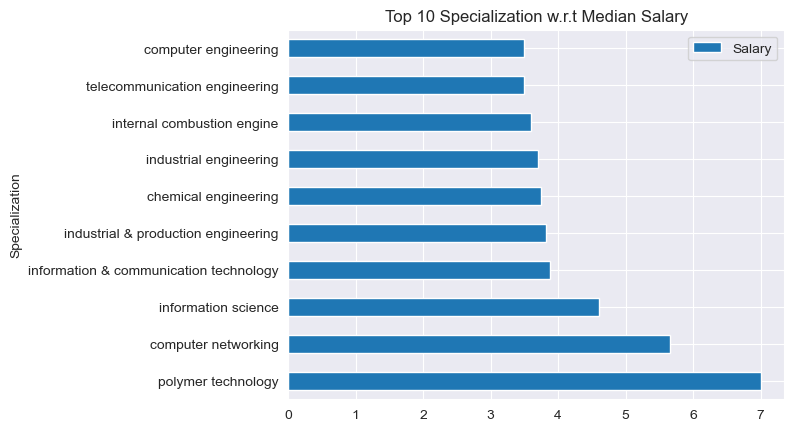

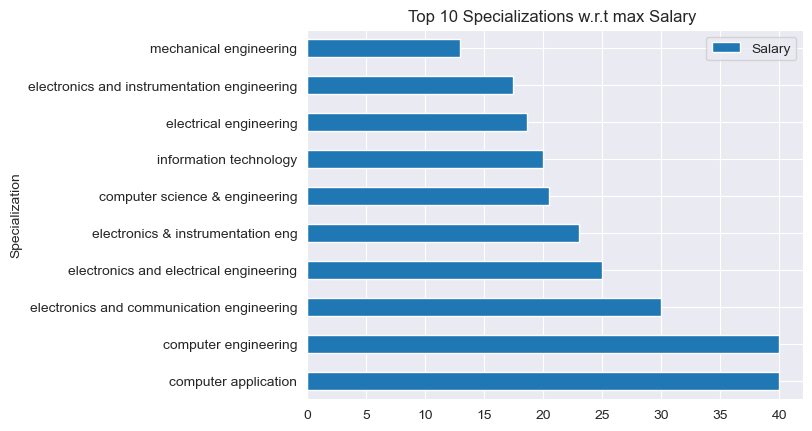

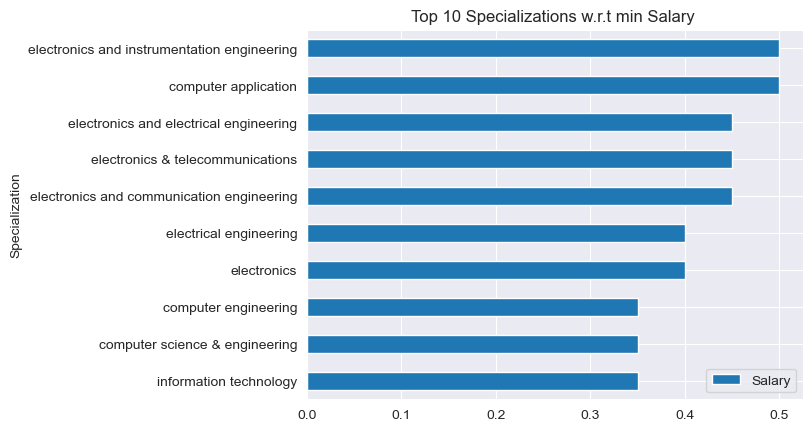

In [136]:
plt.figure(figsize=(10,10))
salary_special.median().sort_values(by='Salary',ascending=False)[:10].plot(kind='barh')
plt.title('Top 10 Specialization w.r.t Median Salary')
salary_special.max().sort_values(by='Salary',ascending=False)[:10].plot(kind='barh')
plt.title('Top 10 Specializations w.r.t max Salary ')
salary_special.min().sort_values(by='Salary')[:10].plot(kind='barh')
plt.title('Top 10 Specializations w.r.t min Salary ')


#### Observation
- Max Median salary is offered by Polymer Technology Specialization
- Max Salary is offered by Computer Application Specialization
- Min Salary is offered by Information Technology Specialization

### Gender vs Salary

<Axes: title={'center': 'Salary without outliers vs Gender'}, xlabel='Gender', ylabel='Salary'>

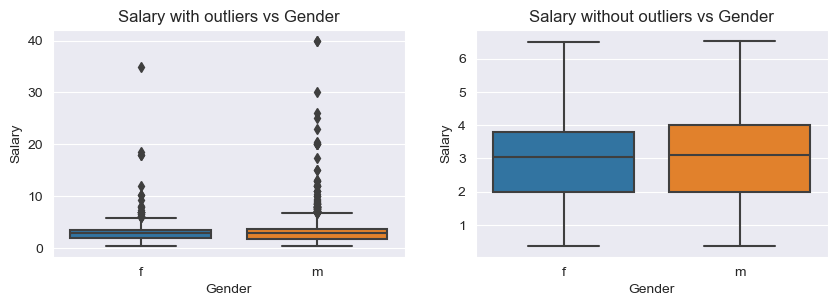

In [137]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.title('Salary with outliers vs Gender')
sns.boxplot(data=df[['Salary','Gender']],x='Gender',y='Salary')
plt.subplot(322)
plt.title('Salary without outliers vs Gender')
sns.boxplot(data=clean_df[['Salary','Gender']],x='Gender',y='Salary')


#### Observation
- Median compensation between male and female candidates is simiilar.
- But the density of outliers is much more in male candidates than female candidates

### Relationship between College State and Salary

In [138]:
salary_collegestate=df[['Salary','CollegeState']].groupby(by='CollegeState')

Text(0.5, 1.0, 'Top 10 CollegeState w.r.t min Salary ')

<Figure size 1000x1000 with 0 Axes>

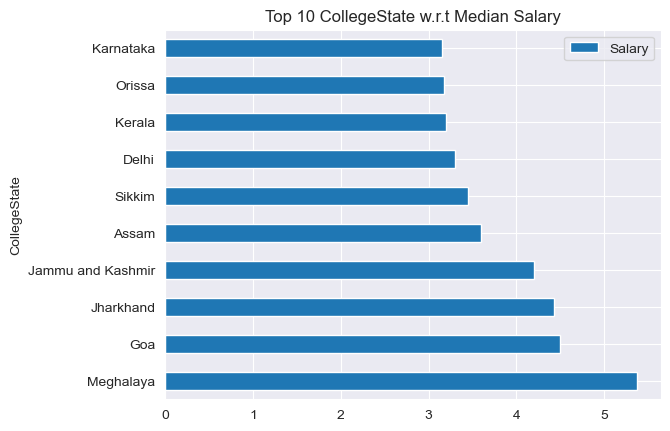

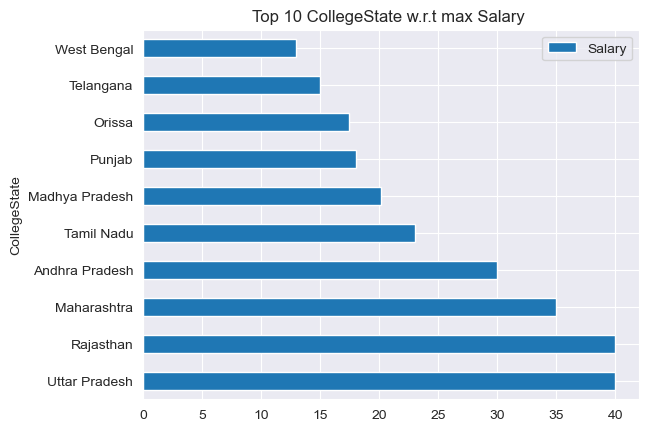

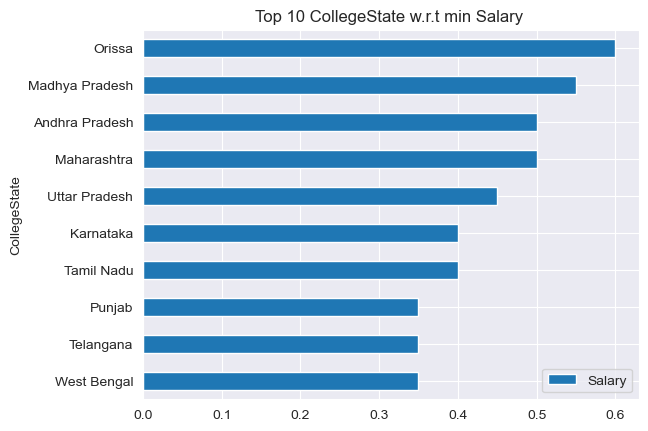

In [139]:
plt.figure(figsize=(10,10))
salary_collegestate.median().sort_values(by='Salary',ascending=False)[:10].plot(kind='barh')
plt.title('Top 10 CollegeState w.r.t Median Salary')
salary_collegestate.max().sort_values(by='Salary',ascending=False)[:10].plot(kind='barh')
plt.title('Top 10 CollegeState w.r.t max Salary ')
salary_collegestate.min().sort_values(by='Salary')[:10].plot(kind='barh')
plt.title('Top 10 CollegeState w.r.t min Salary ')


### Observation
- Max Median packages offered to candidates studied at Meghalaya 
- Maximum package were offered to candidates who studied in a UP college
- Minimum package was offered to candidate who studied in a WB college

### Maximum Salary secured by a candidate who didn't gave any Computer related domain during AMCAT

In [140]:
df[(df['ComputerProgramming']==-1) & (df['ComputerScience']==-1)]['Salary'].sort_values(ascending=False)

166     18.60
2493    17.45
2152    12.00
2230    12.00
123     12.00
        ...  
3002     0.60
1385     0.50
1617     0.50
1957     0.45
3231     0.40
Name: Salary, Length: 824, dtype: float64

### % of attendance to domain exams


In [141]:
domains=df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']]
attendance=[((domains[col]!=-1).sum()/len(df))*100 for col in domains.columns]
attendance


[78.28914457228613,
 28.61430715357679,
 22.56128064032016,
 5.877938969484743,
 4.027013506753377,
 9.354677338669335,
 1.0505252626313157]

<Axes: title={'center': '% attendance of domain exams'}>

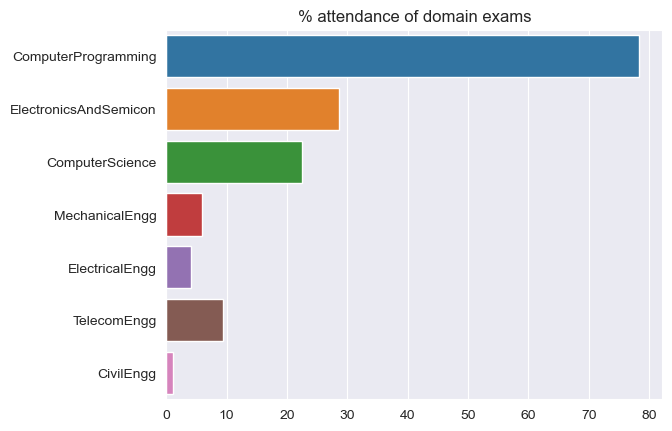

In [142]:
plt.title('% attendance of domain exams')
sns.barplot(x=attendance,y=domains.columns)

#### Observation
- 78% of Candidates gave Computer Programming domain exam in Amcat

### Relationship between Salary and Logical,English,Quant Scores

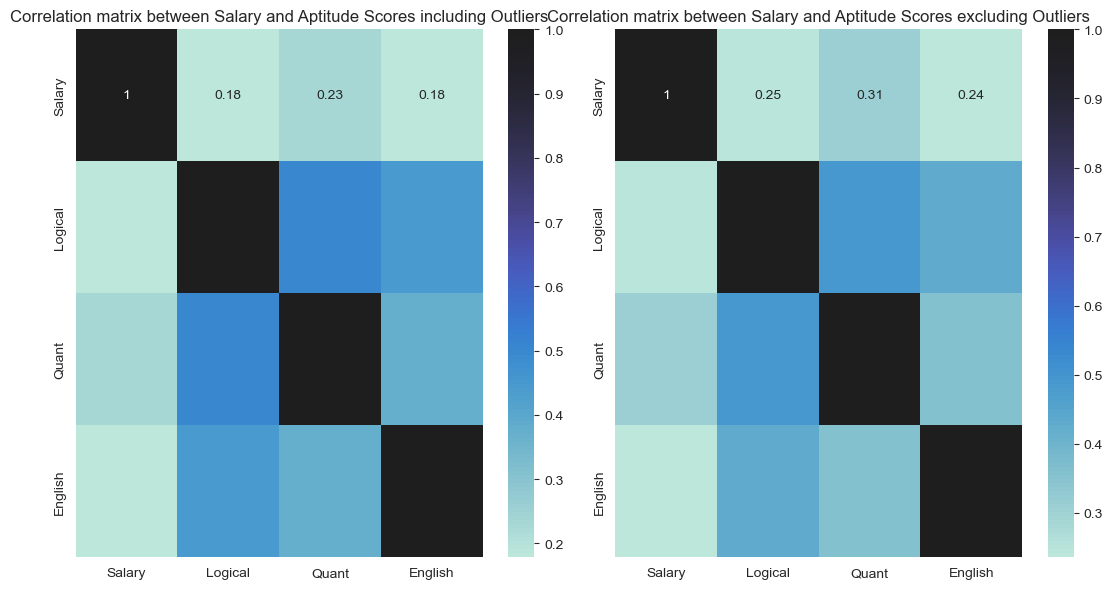

In [143]:
plt.figure(figsize=(11,6))
plt.subplot(121)
plt.title('Correlation matrix between Salary and Aptitude Scores including Outliers')
sns.heatmap(df[['Salary','Logical','Quant','English']].corr(),annot=True,center=1)
plt.subplot(122)
plt.title('Correlation matrix between Salary and Aptitude Scores excluding Outliers')
sns.heatmap(clean_df[['Salary','Logical','Quant','English']].corr(),annot=True,center=1)
plt.tight_layout()


### Observation
- Quantitative Reasoning has highest correlaiton with the salary

### Relationship between Salary and Big 5 Personality Checks

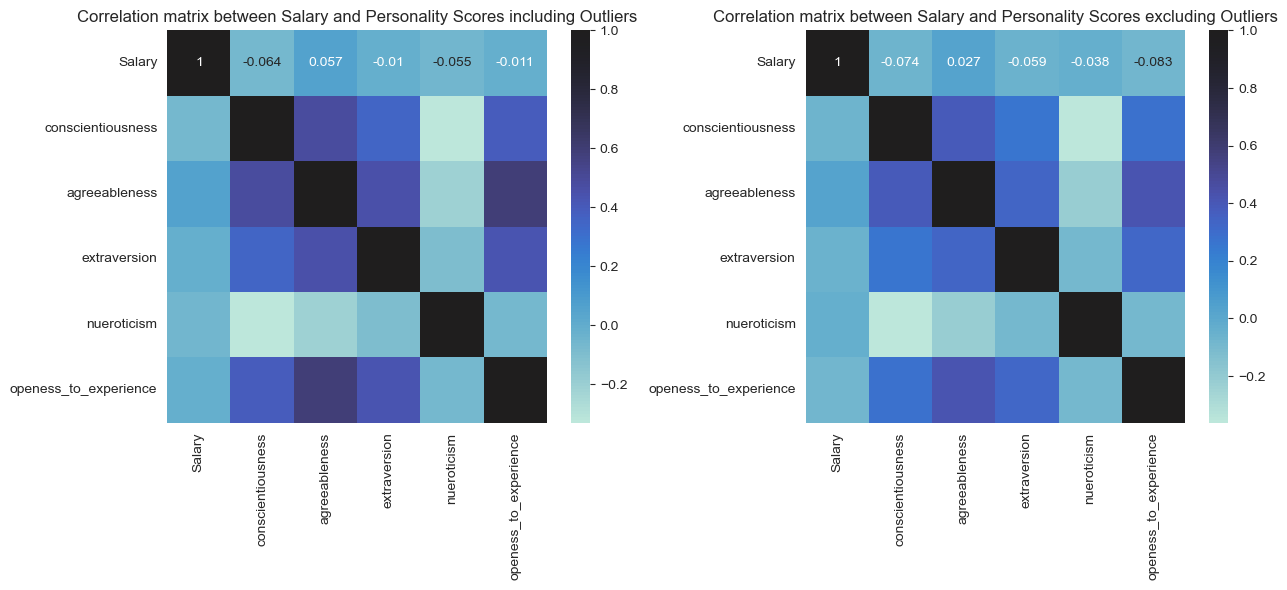

In [144]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.title('Correlation matrix between Salary and Personality Scores including Outliers')
sns.heatmap(df[['Salary','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience']].corr(),annot=True,center=1)
plt.subplot(122)
plt.title('Correlation matrix between Salary and Personality Scores excluding Outliers')
sns.heatmap(clean_df[['Salary','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience']].corr(),annot=True,center=1)
plt.tight_layout()


#### Observation
- Personality scores and Salary are not highly correlated

# Research Question
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” 


H0-  Mean salary is 2.75L

H1-  Mean salary is not 2.75L

In [145]:
# Consider all specializations which have computer word in it
computer_jobs=df[['Specialization','Designation','Salary']][df['Specialization'].str.contains('computer',regex=False)]
t_stats,p_val,result=[],[],[]
def t_test(designation):
    t_statistic, p_value =  stats.ttest_1samp(computer_jobs['Salary'][computer_jobs['Designation']==designation],2.75)

    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
    t_stats.append(t_statistic)
    p_val.append(p_value)
    
    if t_statistic<0 or t_statistic==None:
        print('Not enough data')
    elif p_value<0.05 and t_statistic>0:
        print('Null Hypothesis is rejected---Mean Salary for {} is not equal to 2.75'.format(designation))
    else:
        print('Null Hypothesis is not rejected---Mean Salary for {} is  equal to 2.75'.format(designation))
        


In [146]:
for designation in ['programmer analyst','software engineer','hardware engineer','associate engineer']:
    t_test(designation)

T-statistic: 9.662583462303736
P-value: 1.5624620958175607e-13
Null Hypothesis is rejected---Mean Salary for programmer analyst is not equal to 2.75
T-statistic: 7.816693023627976
P-value: 1.1365392982872651e-13
Null Hypothesis is rejected---Mean Salary for software engineer is not equal to 2.75
T-statistic: nan
P-value: nan
Null Hypothesis is not rejected---Mean Salary for hardware engineer is  equal to 2.75
T-statistic: -0.7019212139086011
P-value: 0.53328424401178
Not enough data


In [150]:
result=['Null Hypothesis is rejected','Null Hypothesis is rejected','Not Enough Data','Not Enough Data']
result_df=pd.DataFrame(data={'Designation':['programmer analyst','software engineer','hardware engineer','associate engineer'],
                             'T-statistic':t_stats,'p-value':p_val,'Result':result})
result_df

,Designation,T-statistic,p-value,Result
0,programmer analyst,9.662583,0.000001,Null Hypothesis is rejected
1,software engineer,7.816693,0.000001,Null Hypothesis is rejected
2,hardware engineer,NaN,0.000001,Not Enough Data
3,associate engineer,-0.701921,0.000001,Not Enough Data


#### Observation
- For Programmer analyst and Software Engineer Specializations, the mean salary is not 2.75 Lakhs as mentioned in the news article
- For Hardware Engineer and Associate Engineer, there is not enough data to perform a accurate Hypothesis testing


## Specialization vs Gender

Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

Ho- Null Hypothesis: There does not exist a significant relationship

H1- Alternate Hypthesis: There does  exist a significant relationship.

In [149]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Specialization'],df['Gender'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print(p_val<0.05)


Chi-square statistic: 104.46891913608454
P-value: 1.2453868176977011e-06
True


<table>
<tr><td>Chi2 statistic</td><td>104.46891913608454</td>
<tr><td>p-value</td><td>1.2453868176977011e-06</td>
<tr><td>result</td><td>Null Hypothesis is rejected</td>
</table>

As p-val is less than 0.05. We reject null hypothesis, thus there exist significant relation ship between specialization and gender